2. Titanic Survival Prediction
   - Goal: Predict survival of Titanic passengers using demographic data.
   - Dataset: Kaggle Titanic Dataset.
   - Tools: Logistic Regression, Random Forest, Pandas, Matplotlib.
   - Skills: Classification, handling missing data, data preprocessing.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
# loading dataset

dataset = pd.read_csv("Titanic-Dataset.csv")


# read dataset

print(dataset.head())
print(dataset.info())
print(dataset.describe())
dataset

# Survived is our target column (0 = died, 1 = survived).
# Other columns (like Sex, Age, Pclass, etc.) are features.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


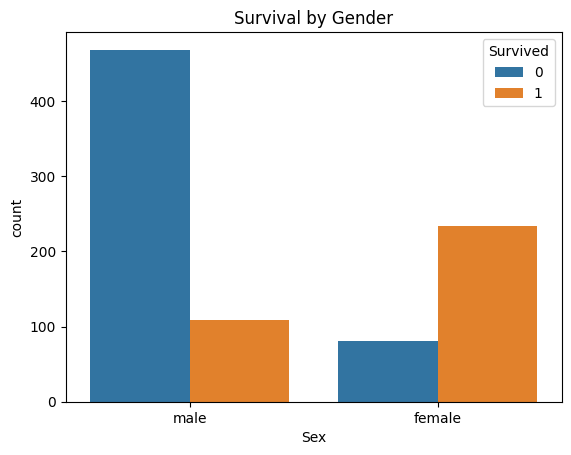

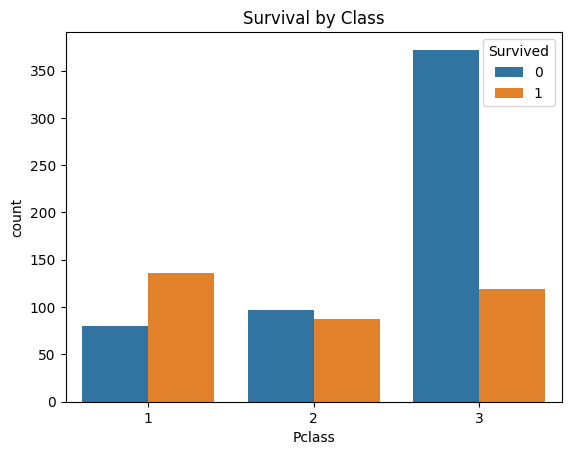

In [19]:
# survival by sex

sns.countplot(data=dataset, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()


# survival by class

sns.countplot(data=dataset, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

# These patterns will help you decide which features are important when training our model.

Handling Missing Data

In [20]:
# checking for missing values

dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# filling the data in age feature

dataset['Age'].fillna(dataset['Age'].median(), inplace=True)


# filling data in embarked feature

dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
dataset.drop(columns=['Cabin'], inplace=True)


# recheck the nan value
dataset.isnull().sum()

C:\Users\pushk\AppData\Local\Temp\ipykernel_22240\840891895.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
C:\Users\pushk\AppData\Local\Temp\ipykernel_22240\840891895.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
# Convert 'Sex' and 'Embarked'
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)


Feature Selection

In [23]:
# choosing useful columns and dropping unnecessary features

dataset.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

Train Test Split

In [24]:
# Separating features and labels. Spliting data into training and testing sets

from sklearn.model_selection import train_test_split

X = dataset.drop("Survived", axis=1)
y = dataset["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Logistic Regression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)


# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Model Evaluation

In [26]:
# Use accuracy, confusion matrix, and classification report to evaluate.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Feature Importance

C:\Users\pushk\AppData\Local\Temp\ipykernel_22240\3460277471.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


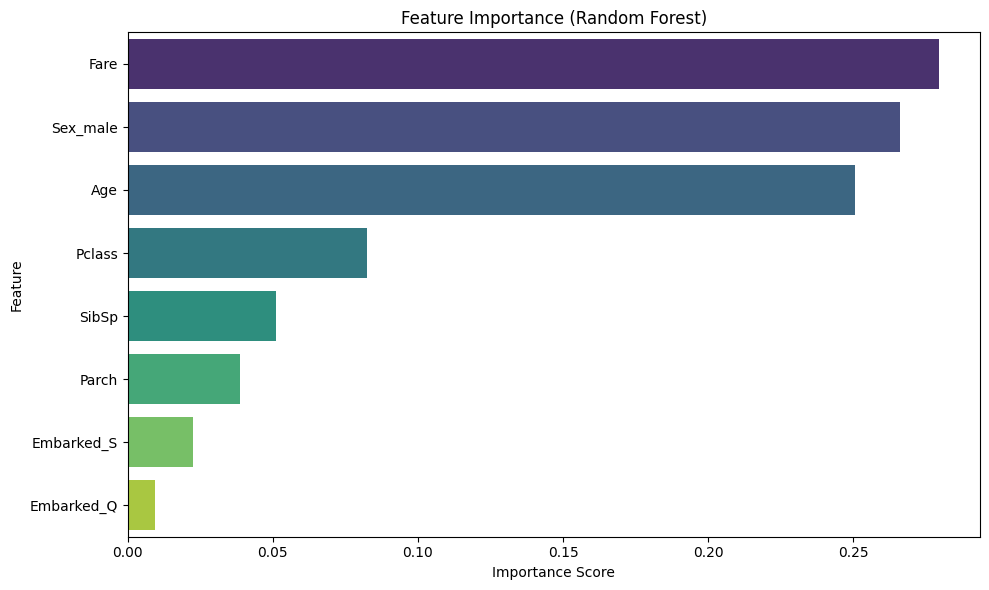

In [ ]:
# Getting feature importance from Random Forest

# Creating a DataFrame for features and their importance scores

feature_importance = pd.DataFrame({'Feature': X_train.columns,'Importance': rf.feature_importances_})


# Sorting by importance

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


# Plot

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Saving the model

In [ ]:
import joblib

# Save models

joblib.dump(lr, "logistic_regression_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")


# load models
# lr_loaded = joblib.load("logistic_regression_model.pkl")
# rf_loaded = joblib.load("random_forest_model.pkl")


What I Learned
    In this project, I learned how to build a real-world classification model using the Titanic dataset. I practiced essential data science skills, including:

        Data exploration (EDA) to understand survival patterns.

        Handling missing values using strategies like filling with median/mode.

        Encoding categorical features to prepare data for machine learning.

        Building models with Logistic Regression and Random Forest using scikit-learn.

        Evaluating models using accuracy, confusion matrix, and classification report.

        Interpreting feature importance to understand what influenced survival the most.

    Overall, this project gave me hands-on experience with the complete ML pipeline — from raw data to actionable insights.